In [15]:
import torch
import numpy as np
import math
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from sklearn.model_selection import train_test_split
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import r2_score
import matplotlib as mpl
import os
import gc
import pandas as pd
import csv
from numpy import *
from torch.utils.tensorboard import SummaryWriter
from datetime import date
import random
from generate_property import output_property

In [16]:
## different amino acids
amino_acid = ['A','B','C','D','E','F','G','H','I','X'] # X is the uncommon amino acid, so total length is 6
np.save('../model/categorical_variables', amino_acid)
print('Number of unique amino acids are', np.shape(np.unique(amino_acid))[0])

def onehotseq(sequence):
  seq_len = len(sequence)
  seq_en = np.zeros(( seq_len, np.shape(amino_acid)[0]))
  for i in range(seq_len):
      seq_en[i,sequence[i]] = 1
  return seq_en

Number of unique amino acids are 10


**All Dataset**

yes


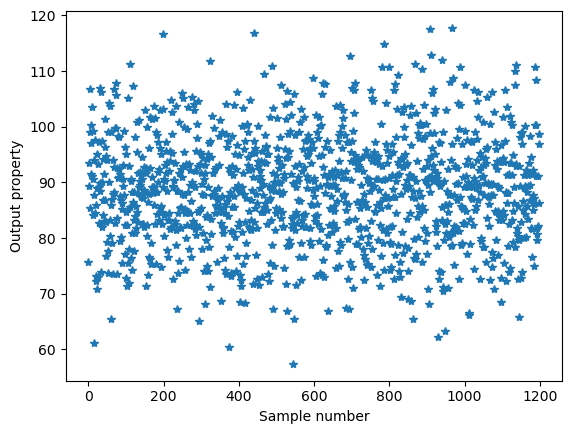

In [17]:
N=1200
L=50
m_l = 1
motif_length = 3
creating_example = np.zeros((N,L), dtype=int) #np.random.randint(0,5, (N,L), dtype=int)
seq_length = np.ones((N,), dtype=int)*L
prop = np.zeros((N,L))

## creating the primary sequence
for i in range(N):
    j = 0
    while j <= (L-m_l):
        choose_aa = random.choices([0,1,2,3,4,5,6,7,8,9], \
            weights=[0.108,0.108,0.108,0.108,0.108,0.108,0.108,0.108,0.108,0.02], k=1)[0]
        creating_example[i,j:j+m_l] = int(choose_aa)
        j += 1

output_y, prop = output_property(creating_example)

output_seq = prop

ohe = np.zeros((creating_example.shape[0], creating_example.shape[1], len(amino_acid)))
for i in range(ohe.shape[0]): 
    l = seq_length[i]
    ohe[i,0:l,:] = onehotseq(creating_example[i,0:l])

plt.plot(output_y, '*')
plt.ylabel('Output property')
plt.xlabel('Sample number')
plt.show()

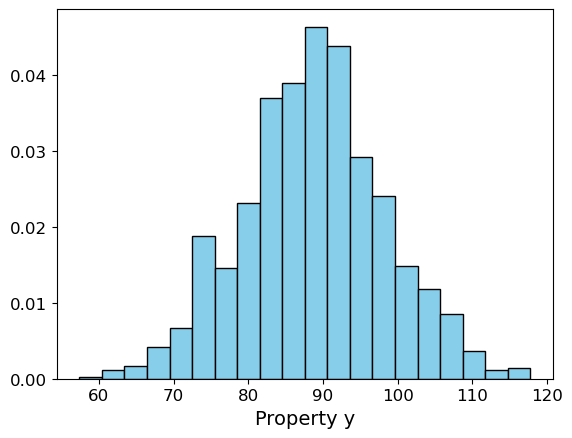

In [18]:
plt.hist(output_y, bins=20, color='skyblue', edgecolor='black', density=True)
plt.xlabel('Property y', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


**Divide Dataset**

In [19]:
all_ex = np.arange(ohe.shape[0])
X, x_test, _, _ = train_test_split( all_ex, all_ex, test_size=0.083333,random_state=10)
x_train, x_valid, _, _ = train_test_split( X, X, test_size=0.0909,random_state=10)

print('Train',x_train.shape)
print('Test' ,x_test.shape)
print('Valid',x_valid.shape)

print(ohe[x_train].shape, seq_length[x_train].shape, output_y[x_train].shape)

Train (1000,)
Test (100,)
Valid (100,)
(1000, 50, 10) (1000,) (1000,)


In [20]:
np.save('./x_train', ohe[x_train])
np.save('./len_train', seq_length[x_train])
np.save('./y_train', output_y[x_train])

np.save('./x_valid', ohe[x_valid])
np.save('./len_valid', seq_length[x_valid])
np.save('./y_valid', output_y[x_valid])

np.save('./x_test', ohe[x_test])
np.save('./len_test', seq_length[x_test])
np.save('./y_test', output_y[x_test])
np.save('./test_sequence_output', output_seq[x_test])

print('Shape of seq output', output_seq[x_test].shape)
    
# np.save('./store_data/x_train'+str(trial), ohe[x_train])
# np.save('./store_data/len_train'+str(trial), seq_length[x_train])
# np.save('./store_data/y_train'+str(trial), output_y[x_train])

# np.save('./store_data/x_valid'+str(trial), ohe[x_valid])
# np.save('./store_data/len_valid'+str(trial), seq_length[x_valid])
# np.save('./store_data/y_valid'+str(trial), output_y[x_valid])

# np.save('./store_data/x_test'+str(trial), ohe[x_test])
# np.save('./store_data/len_test'+str(trial), seq_length[x_test])
# np.save('./store_data/y_test'+str(trial), output_y[x_test])

Shape of seq output (100, 50)


In [21]:
print(np.argmax(ohe[x_test], axis=2)[9])

[2 8 6 5 3 0 6 8 2 0 4 5 1 5 9 4 4 6 4 2 6 7 6 8 4 8 6 2 3 4 3 2 7 8 2 4 5
 3 7 2 3 8 0 4 5 8 7 0 7 7]
